In [1]:
pip install tensorflow

In [2]:
pip install numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential, load_model, Model
from keras.applications.mobilenet import MobileNet

In [4]:
# Initialize a sequential model and load pre-trained MobileNet as the base
model = Sequential()
mobilenet = MobileNet()

# Add all but the last layer of MobileNet to the new sequential model

for layer in range(len(mobilenet.layers)-1):
    model.add(mobilenet.layers[layer])
    
# Freeze all layers except for the last 9 layers
    
for layer in model.layers[:-9]:
    layer.trainable = False

# Add a new dense output layer for two class classification (mask, no mask)
    
model.add(Dense(2, activation = 'softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
# Load the MobileNet model, pre-trained on ImageNet data, excluding the top fully connected layer

mobilenet = MobileNet(include_top = False)

# Get the output of the pre-trained model
x = mobilenet.output

# Add a global average pooling layer to reduce the dimensionality of the output feature map from the base model
x=GlobalAveragePooling2D()(x)
# Add a dense fully connected layer with 1024 neurons and ReLU activation to learn more complex combinations of features
x=Dense(1024,activation='relu')(x)
# Add another similar dense layer to refine the features to be used for the final prediction
x=Dense(1024,activation='relu')(x)
# Add a dense layer with 512 neurons for further processing
x=Dense(512,activation='relu')(x)
# Add the final output layer with two neurons (assuming binary classification, e.g., mask vs. no mask) with softmax activation
preds = Dense(2,activation='softmax')(x)
# Instantiate the final model, which includes the base MobileNet model and the added layers
model = Model(inputs = mobilenet.input, outputs=preds)
# Set the layers of the model up to the last 9 layers as non-trainable (freeze them)
for layer in model.layers[:-9]:
    layer.trainable = False

C:\Users\rohit\AppData\Local\Temp\ipykernel_17016\1517825428.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(include_top = False)


In [6]:
# Save the model to a file

model.save('mdl.h5')

# Load the model from the file
mdl = load_model('mdl.h5')

In [7]:
# Display the summary of the model
model.summary()

Model: "functional_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,853,890 (22.33 MB)

 Trainable params: 3,675,650 (14.02 MB)

 Non-trainable params: 2,178,240 (8.31 MB)

In [8]:
# Set up directories for dataset

dir=os.listdir(r'C:\Users\rohit\OneDrive\Desktop\3rd SEM\PR\Project\Face-mask detection\Dataset')

# Initialize lists to hold image data and labels

X = []
y = []

# Load images and labels from 'withmask' directory

for i in os.listdir(r'C:\Users\rohit\OneDrive\Desktop\3rd SEM\PR\Project\Face-mask detection\Dataset\withmask'):
    img = load_img(r'C:\Users\rohit\OneDrive\Desktop\3rd SEM\PR\Project\Face-mask detection\Dataset\withmask/'+str(i), target_size = (224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    X.append(img)
    y.append([1,0])
# Load images and labels from 'withoutmask' directory

for i in os.listdir(r'C:\Users\rohit\OneDrive\Desktop\3rd SEM\PR\Project\Face-mask detection\Dataset\withoutmask'):
    img = load_img(r'C:\Users\rohit\OneDrive\Desktop\3rd SEM\PR\Project\Face-mask detection\Dataset\withoutmask/'+str(i), target_size = (224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    X.append(img)
    y.append([0,1])
    
# Convert lists to numpy arrays

data = np.array(X)
labels = np.array(y)

In [9]:
# Print the directory path used for dataset

print(dir)

['withmask', 'withoutmask']


In [10]:
len(os.listdir(r'C:\Users\rohit\OneDrive\Desktop\3rd SEM\PR\Project\Face-mask detection\Dataset\withmask'))


9564

In [11]:
data

array([[[[-0.67058825, -0.7019608 , -0.70980394],
         [-0.654902  , -0.7019608 , -0.7019608 ],
         [-0.64705884, -0.6862745 , -0.70980394],
         ...,
         [-0.6       , -0.6627451 , -0.6862745 ],
         [-0.5764706 , -0.6156863 , -0.64705884],
         [-0.58431375, -0.60784316, -0.64705884]],

        [[-0.64705884, -0.70980394, -0.7254902 ],
         [-0.6313726 , -0.69411767, -0.70980394],
         [-0.6627451 , -0.7254902 , -0.7411765 ],
         ...,
         [-0.6313726 , -0.67058825, -0.7176471 ],
         [-0.6       , -0.6392157 , -0.6862745 ],
         [-0.60784316, -0.64705884, -0.69411767]],

        [[-0.6392157 , -0.67058825, -0.69411767],
         [-0.6627451 , -0.7019608 , -0.7254902 ],
         [-0.67058825, -0.7176471 , -0.7176471 ],
         ...,
         [-0.5921569 , -0.6313726 , -0.6627451 ],
         [-0.62352943, -0.6627451 , -0.69411767],
         [-0.654902  , -0.69411767, -0.7254902 ]],

        ...,

        [[-0.42745095, -0.42745095, -0

In [12]:
labels

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [13]:
np.save('data',data)
np.save('labels',labels)

In [14]:
labels.shape

(18267, 2)

In [15]:
data.shape

(18267, 224, 224, 3)

In [16]:
# Split data into training and test sets

(trainX, testX, trainY, testY) = train_test_split(data, labels)

In [17]:
# Display number of samples in training and test datasets

print(len(trainX), len(testX), len(trainY), len(testY))

13700 4567 13700 4567


In [18]:
#model.compile(loss="binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])


In [19]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model

History = model.fit( trainX, trainY, epochs = 20, batch_size = 32, validation_split = 0.1)

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.9725 - loss: 0.0857 - val_accuracy: 0.9642 - val_loss: 0.1255
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 94s 244ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9796 - val_loss: 0.0656
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 93s 241ms/step - accuracy: 0.9947 - loss: 0.0198 - val_accuracy: 0.9985 - val_loss: 0.0070
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 93s 242ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9912 - val_loss: 0.0290
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 94s 243ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9978 - val_loss: 0.0133
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 94s 243ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9985 - val_loss: 0.0030
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 93s 242ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9445 - val_loss: 0.3765
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 94s 243ms/step - accuracy: 0.9974 - loss: 

In [20]:
# Evaluate the model on the test dataset

model.evaluate(testX , testY)

143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.9984 - loss: 0.0277


[0.029183104634284973, 0.998248279094696]

In [21]:
# Save the trained model

model.save('MaskNet1.hdf5')

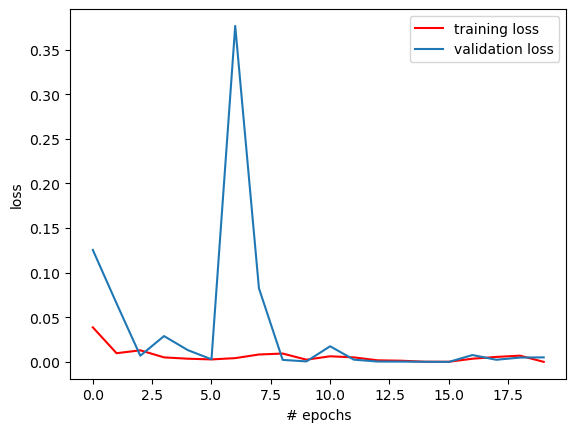

In [22]:
# Plot training and validation loss over epochs

plt.plot(History.history['loss'],'r',label='training loss')
plt.plot(History.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

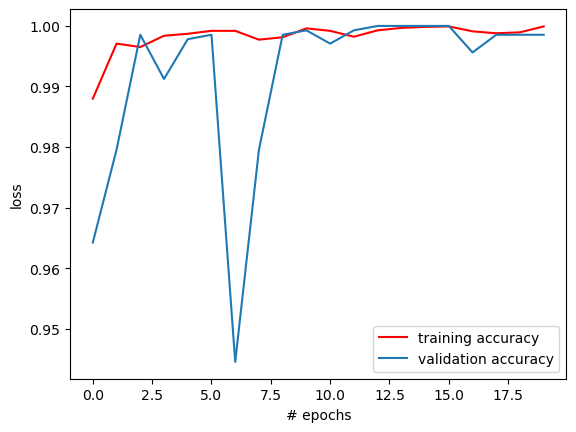

In [23]:
# Plot training and validation accuracy over epochs

plt.plot(History.history['accuracy'],'r',label='training accuracy')
plt.plot(History.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:
# Assuming 'testY' are your true labels and 'model' is your trained model
# Also assuming that testY is one-hot encoded. If not, adjust the code accordingly.
predicted = model.predict(testX)
predicted_classes = np.argmax(predicted, axis=1)
true_classes = np.argmax(testY, axis=1)

143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 205ms/step


In [25]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

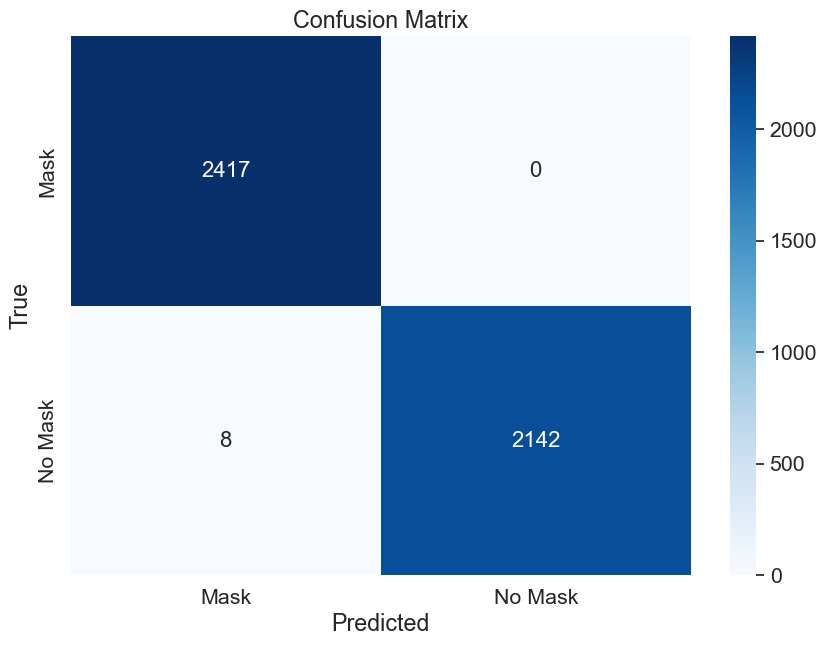

In [26]:
# Display the confusion matrix using seaborn for better aesthetics
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', xticklabels=['Mask', 'No Mask'], yticklabels=['Mask', 'No Mask'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Print the classification report for precision, recall, and F1-score
report = classification_report(true_classes, predicted_classes, target_names=['Mask', 'No Mask'])
print(report)

              precision    recall  f1-score   support

        Mask       1.00      1.00      1.00      2417
     No Mask       1.00      1.00      1.00      2150

    accuracy                           1.00      4567
   macro avg       1.00      1.00      1.00      4567
weighted avg       1.00      1.00      1.00      4567

